# Data Scientist Practical Project – Recipe Nutritional Analysis
**Submitted by: DECHRAOUI Mohammed**  

---

### Required libraries


In [127]:
#Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Data Validation 

In [128]:
#Loading data
data_recipe_site = pd.read_csv("recipe_site_traffic_2212.csv")
data_recipe_site.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [129]:
#find the shape of our dataset
data_recipe_site.shape


(947, 8)

In [130]:
# find all informations on columns of our dataset
data_recipe_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [131]:
#search for duplicate values
data_recipe_site.duplicated(subset='recipe').sum()

0

Since there are no duplicate recipes, we don't need to remove any rows. Next, we'll review the size of the dataset by looking at the number of rows and columns, and we'll also identify the names and data types of each column. We will check how many non-null values each column contains. If we need to convert any data types or handle missing values, we'll make the necessary adjustments.

- Servings

In [132]:
#checking the values of servings column
data_recipe_site['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [133]:
#replacing the rows including "as a snack" with their relevant numeric number
data_recipe_site['servings'] = data_recipe_site['servings'].str.replace(" as a snack", "")

#checking the values of servings column again
data_recipe_site['servings'].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

In [134]:
#converting data type of servings column to integer
data_recipe_site['servings'] = data_recipe_site['servings'].astype('int')

Since the **servings** column only includes integer values, we can convert its data type to integer. Although this column has numerical values, it essentially acts as a categorical variable. For now, we'll keep its numeric data type because it will need to be reverted to integer format during the model development and evaluation stages.

- high_traffic

Since the **high_traffic** column is currently classified as an object, it's important to analyze the distribution of values in this column. This analysis will help us decide the best data type to convert this column to.

In [135]:

#checking the values of high_traffic column
data_recipe_site['high_traffic'].value_counts()

high_traffic
High    574
Name: count, dtype: int64

In [136]:
#replacing the rows with value "High" with True, and null values with False
data_recipe_site['high_traffic'] = np.where(data_recipe_site['high_traffic'] == "High", True, False)

#checking the values of high_traffic column again
data_recipe_site['high_traffic'].value_counts()

high_traffic
True     574
False    373
Name: count, dtype: int64

The **high_traffic** column contains only one distinct value, "High", suggesting that any null values represent "Low" traffic. Therefore, we can change the data type of this column to boolean, where True will represent "High" traffic and False will indicate "Low" traffic.

- category

The **category** column, currently classified as an object type, needs to be evaluated to see if any rows require modification before converting it to a category type. Our first step is to inspect the distribution of values in this column to better understand its contents.

In [137]:
#checking the values of category column
data_recipe_site['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [138]:
#replacing the rows including " Breast" with their relevant numeric number
data_recipe_site['category'] = data_recipe_site['category'].str.replace(" Breast", "")

#checking the values of servings column again
data_recipe_site['category'].value_counts()

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

In [139]:
#converting data type of category column to category
data_recipe_site['category'] = data_recipe_site['category'].astype('category')

The **category** column includes an extra category, "Chicken Breast" which does not align with the predefined categories such as 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', and 'One Dish Meal.' Since 'Chicken Breast' does not fit into these specified categories, it is logical to reclassify it under the 'Chicken' category. We will proceed to make this correction.

In [140]:
#checking the summary of dataframe's structure
data_recipe_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int32   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 43.0 KB


In [141]:
#checking missing numbers for each columns
data_recipe_site.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [142]:
# Filter rows where 'calories' column has missing values (NaN) and group by 'category' and 'servings'
missing_calories_count = data_recipe_site[data_recipe_site['calories'].isna()].groupby(['category', 'servings'], observed=False)['recipe'].count()

# Display the count of recipes with missing calories for each category and servings group
print(missing_calories_count)

category       servings
Beverages      1           0
               2           0
               4           0
               6           0
Breakfast      1           0
               2           0
               4           0
               6           0
Chicken        1           1
               2           1
               4           3
               6           4
Dessert        1           1
               2           2
               4           2
               6           1
Lunch/Snacks   1           0
               2           0
               4           5
               6           2
Meat           1           1
               2           2
               4           2
               6           0
One Dish Meal  1           0
               2           1
               4           3
               6           0
Pork           1           1
               2           0
               4           4
               6           6
Potato         1           1
               2   

We have 52 missing values in the calories, carbohydrate, sugar and protein columns. With 947 observations in our dataset, these missing values represent 18.21% of observations, which is too significant to consider deleting. Consequently, it would be preferable to treat them differently for future analyses. To this end, I propose to fill in these 52 missing values using the average, calculated for each category and servings.

In [143]:
recipe_data = data_recipe_site.copy()
nutritional = ['calories', 'carbohydrate', 'sugar', 'protein']
# Fill missing values in the nutritional columns with the mean of their respective category and servings groups
for name in nutritional:
    # s'assurer que la colonne est numérique
    recipe_data[name] = pd.to_numeric(recipe_data[name], errors='coerce')
    
    group_mean = recipe_data.groupby(['category', 'servings'], observed=False)[name].transform('mean')
    recipe_data[name] = recipe_data[name].fillna(group_mean)

# Si des NaN subsistent (groupes entièrement NaN), on les remplace par la moyenne globale de la colonne
recipe_data[nutritional] = recipe_data[nutritional].fillna(recipe_data[nutritional].mean())


In [144]:
recipe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int32   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int32(1), int64(1)
memory usage: 43.0 KB


In [145]:
#checking missing numbers for each columns
recipe_data.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

Having completed the data validation and cleaning, the dataframe is now ready for exploratory analysis. Next, we can calculate descriptive statistics for each numerical column in the dataframe. This step will offer important insights into the data's characteristics.

## Exploratory Analysis

In [146]:
#generating descriptive statistic for each columns
recipe_data.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,439.825661,35.121916,9.064490,24.577414,3.477297
std,273.519652,442.246009,42.905677,14.447594,35.764050,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,2.000000
50%,474.000000,306.900000,22.330000,4.925750,11.240000,4.000000
75%,710.500000,594.475000,44.740000,9.565000,32.360000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


The descriptive statistics reveal a significant standard deviation in the columns associated with calories and nutritional components. Moreover, the quantile values suggest outliers, which lead to skewness in the distribution. Consequently, we can conclude that the distribution of values is not normal, highlighting that the median is a more representative statistic for these columns.

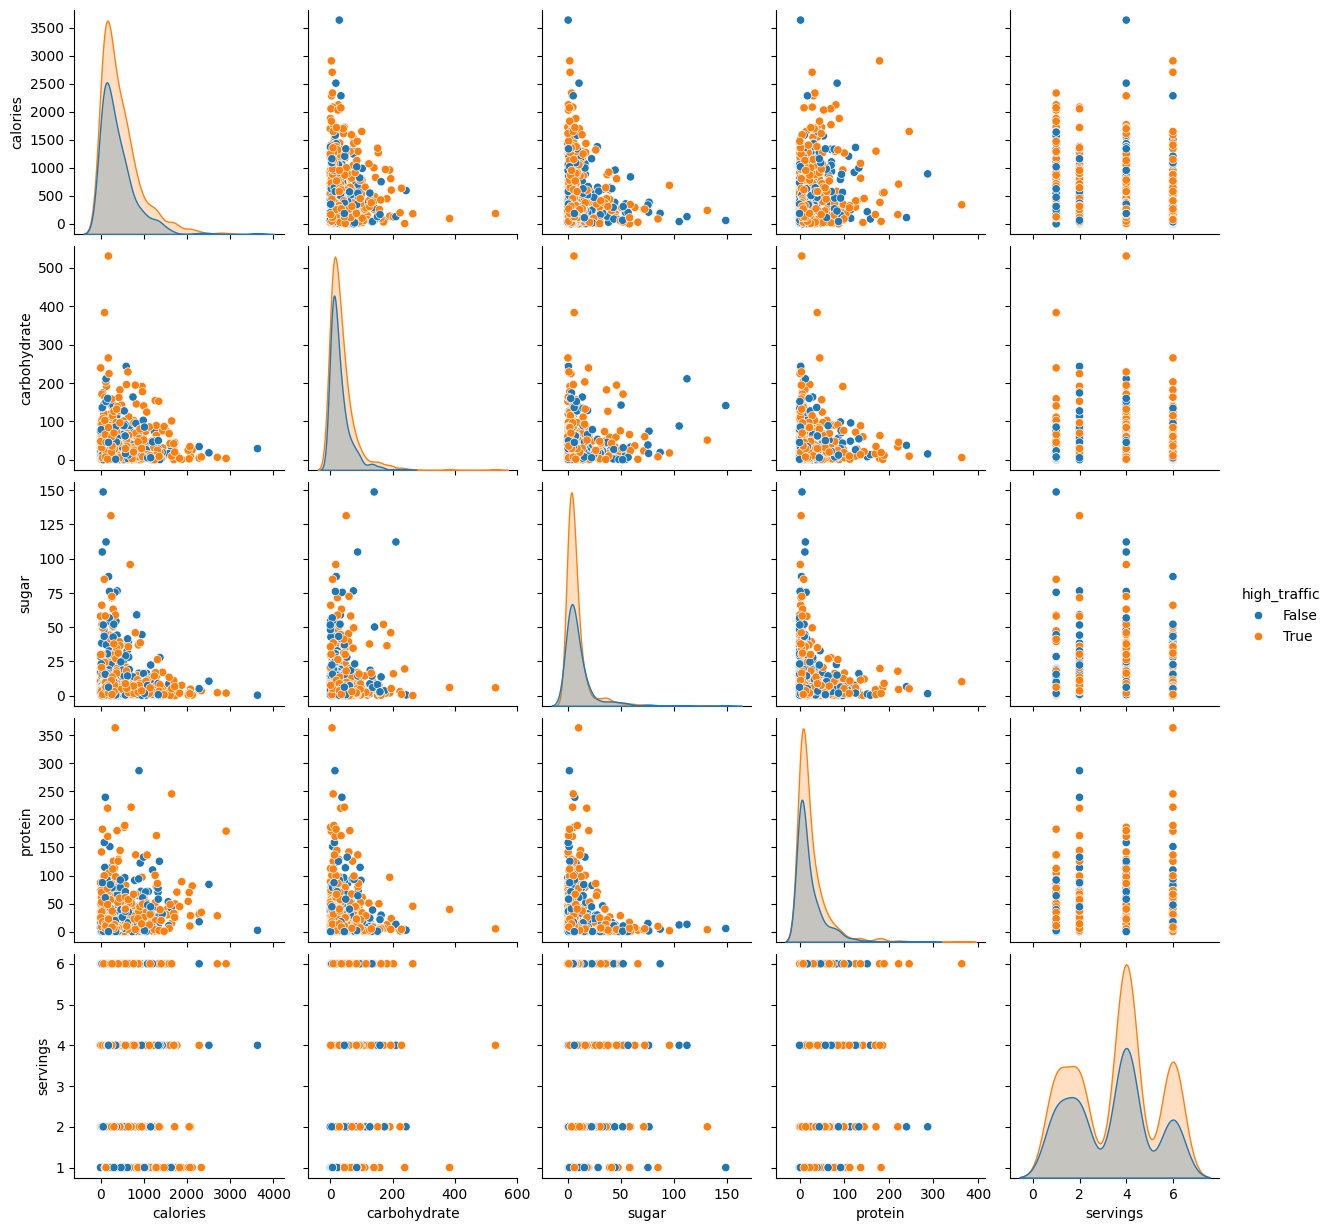

In [147]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(recipe_data[filtered_columns], hue='high_traffic')
plt.show()

The plot clearly shows that there is no significant correlation between these columns. Next, we will create a histogram to visually explore the distribution of calories across the recipes.

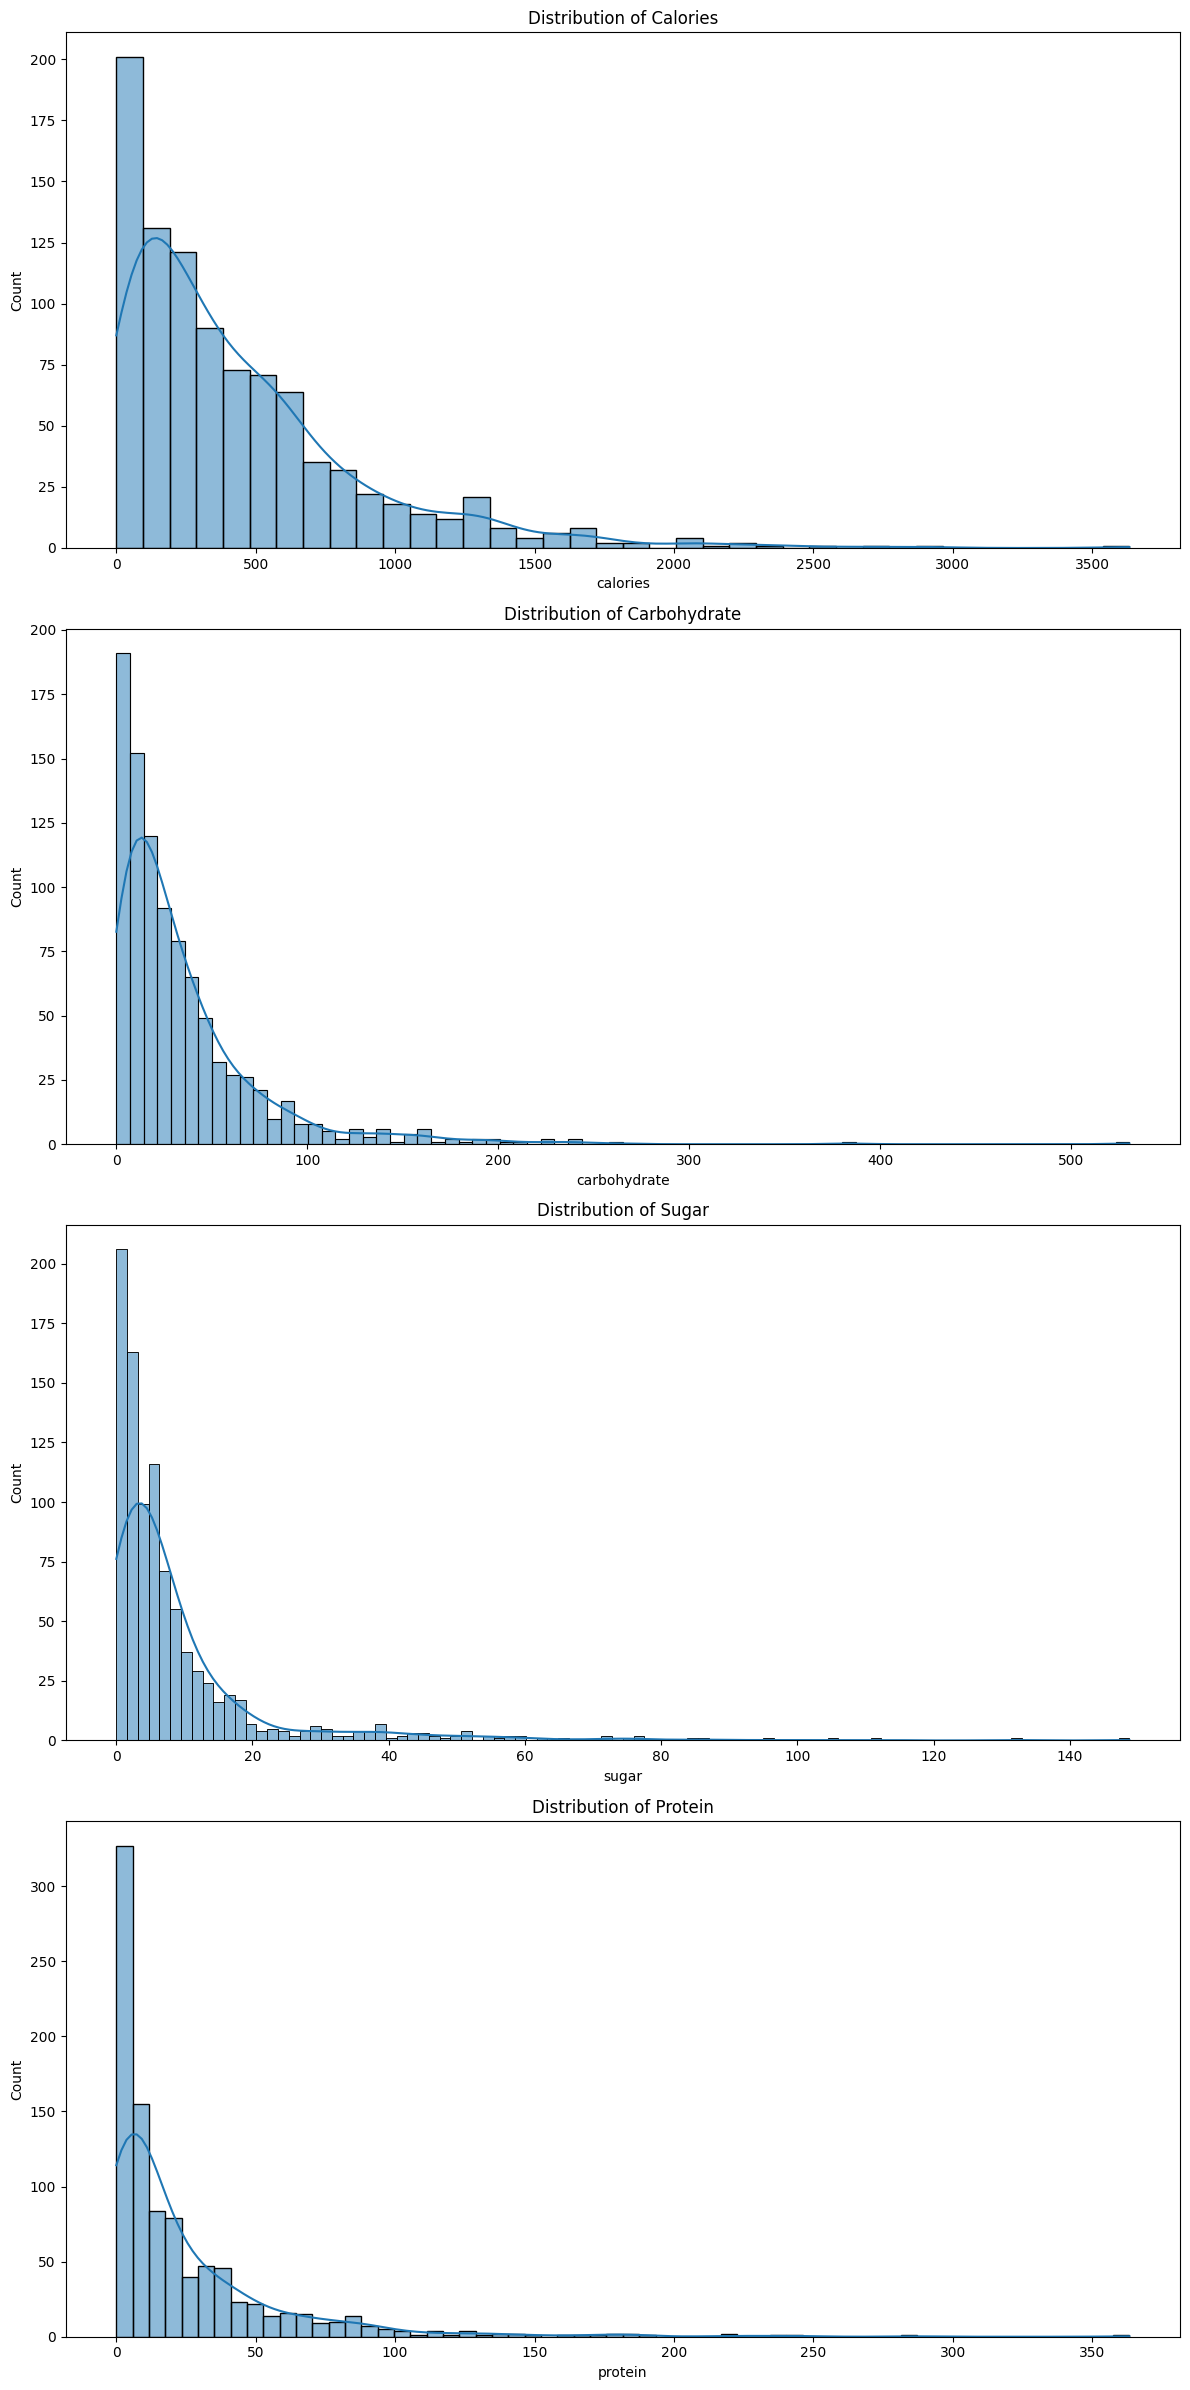

In [148]:
#specifying the numerical columns to plot
numerical_columns =  recipe_data.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=recipe_data, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

The inclusion of Kernel Density Estimation (KDE) in the plots provides a smooth curve that depicts the data's underlying distribution. Observations reveal that the dataset primarily contains lower values for the calorie and nutritional components of foods or beverages. The histograms confirm our previous observation about skewness, showing that all numerical columns exhibit a right-skewed distribution.

Next, we will use box plots to further demonstrate this distribution.

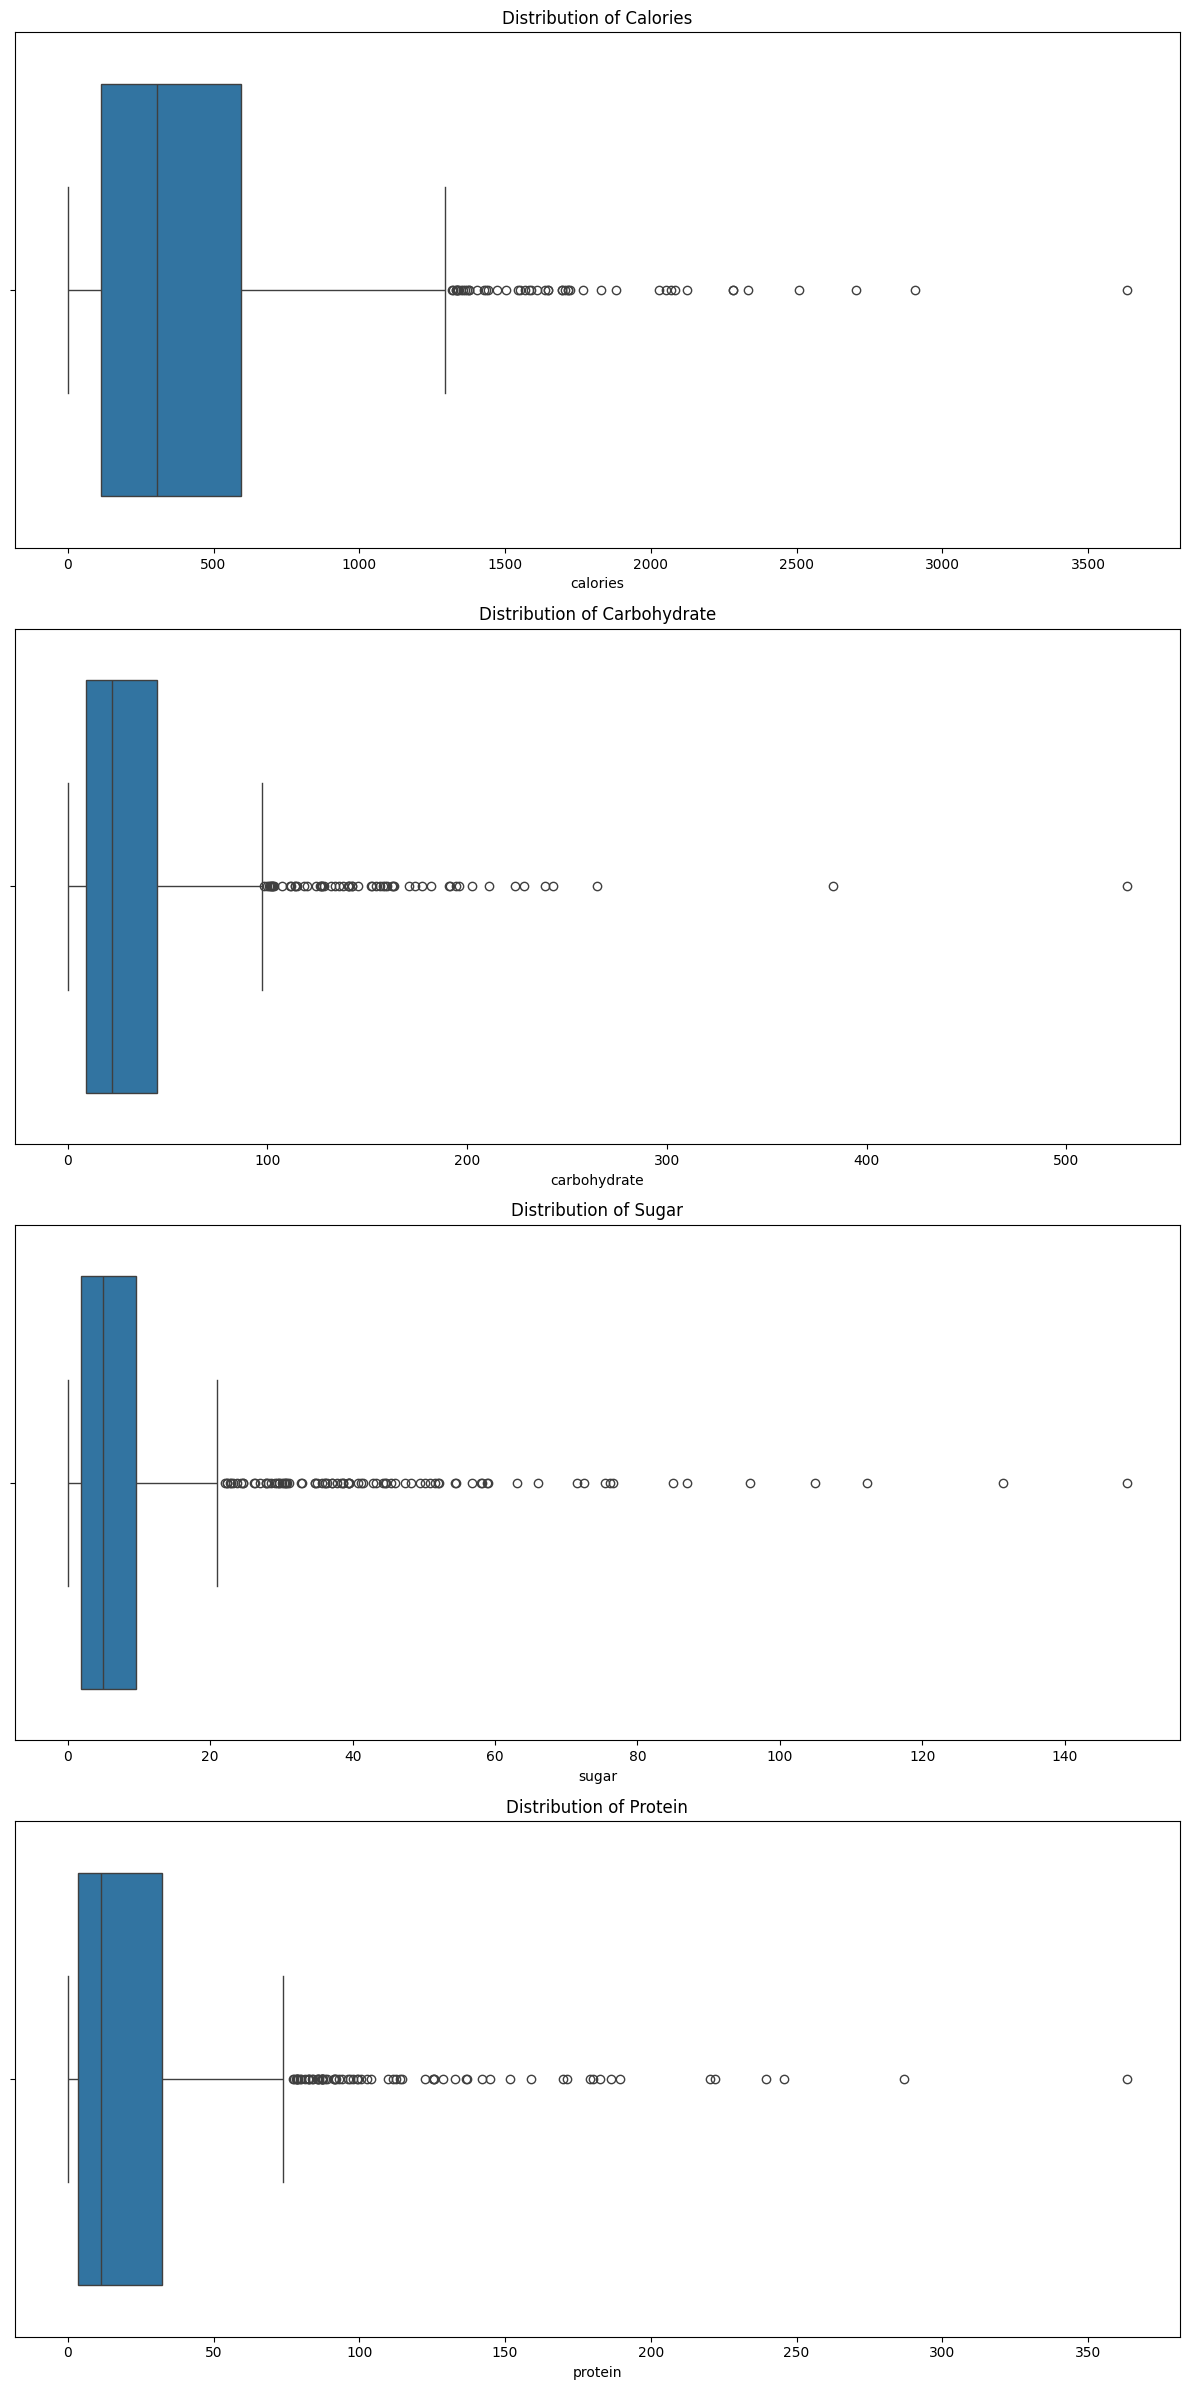

In [149]:
#creating subplots with the desired number of rows and columns
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=recipe_data, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


The plots clearly confirm the presence of outliers, demonstrate the right-skewed distribution of these columns, and underline the relevance of using the median for analysis.

Additionally, we can further investigate the median values of calories and nutritional components by category. This can be done by grouping the data by category and then computing the median for each group.

In [150]:
recipe_data.dtypes

recipe             int64
calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int32
high_traffic        bool
dtype: object

In [151]:
#group by category column and find total number of servings
category_medians = (
    recipe_data
    .groupby("category", observed=True)[numerical_columns]
    .median()
    .reset_index()
)
print(category_medians)

        category    calories  carbohydrate   sugar    protein
0      Beverages  126.455000     11.250000   8.075   0.410000
1      Breakfast  229.380000     28.420000   4.830  11.685000
2        Chicken  401.790000     16.945000   4.035  36.691449
3        Dessert  288.860000     42.809231  29.720   4.860000
4   Lunch/Snacks  411.296842     34.880000   3.380  14.100000
5           Meat  472.910000     20.028235   4.340  29.600000
6  One Dish Meal  442.150000     27.380000   4.160  30.830000
7           Pork  540.540000     20.072000   6.295  34.605000
8         Potato  312.203000     33.540000   2.935   5.970000
9      Vegetable  138.640000     16.880000   3.950   5.080000


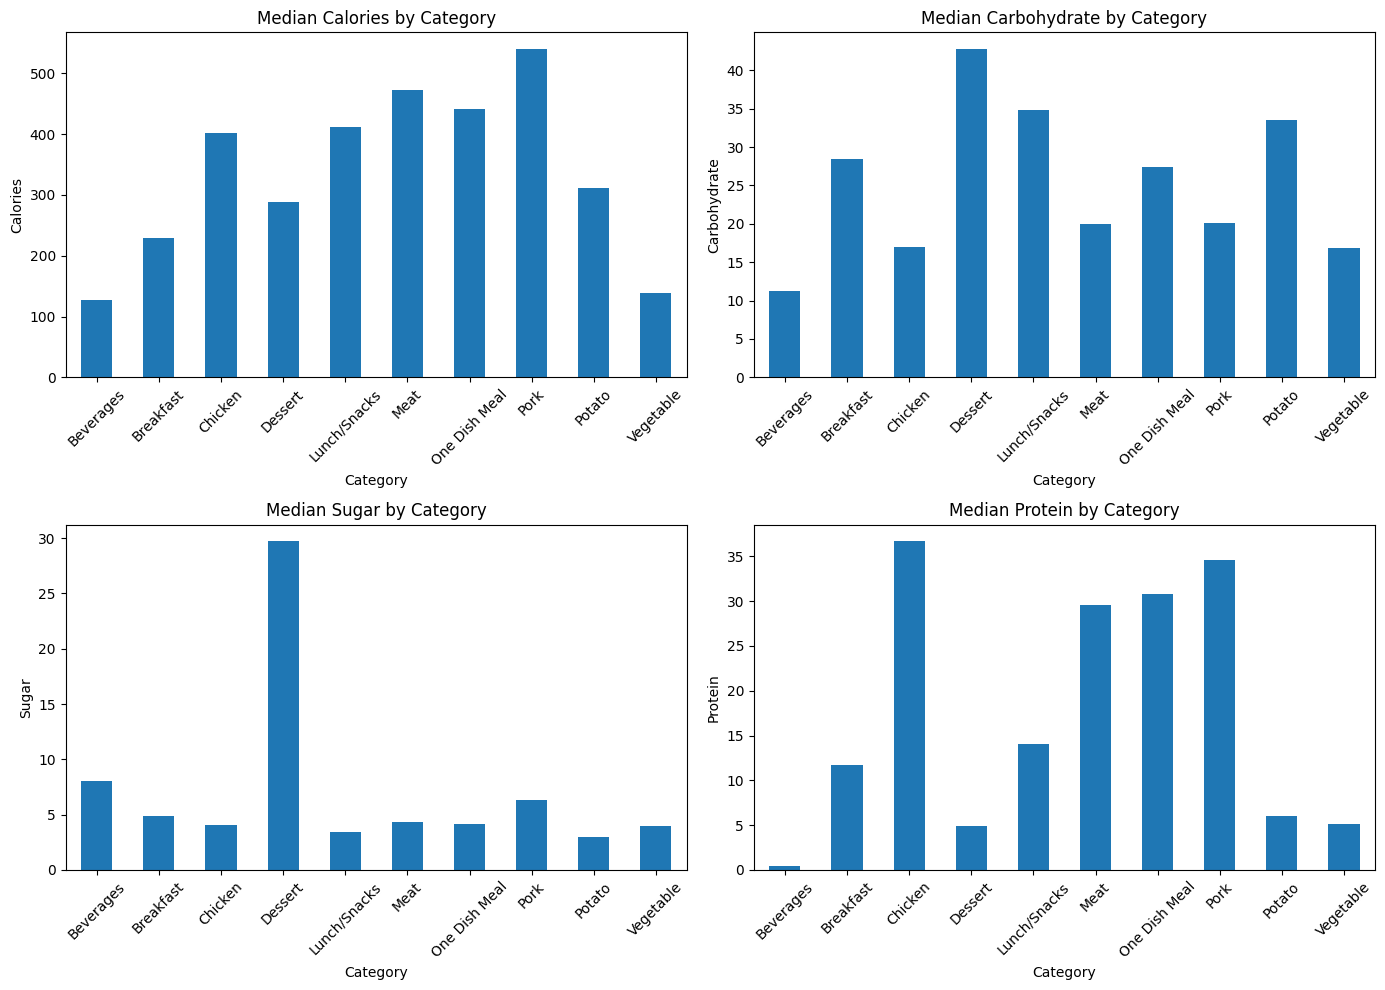

In [152]:
# setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  
axes = axes.flatten() 

# loop over the columns and create a bar plot in each subplot
for i, column in enumerate(numerical_columns):
    category_medians.plot(x="category", y=column, kind="bar", ax=axes[i], legend=False)
    axes[i].set_title(f"Median {column.capitalize()} by Category")
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel(column.capitalize())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# adjust layout to prevent overlap
plt.tight_layout()

# display the plot
plt.show()


The medians for calories and nutritional components are not as symmetrical as expected and differ based on the type of food and beverages.

Next, we will explore the relationship between servings and high traffic status.



- Servings vs. High Traffic

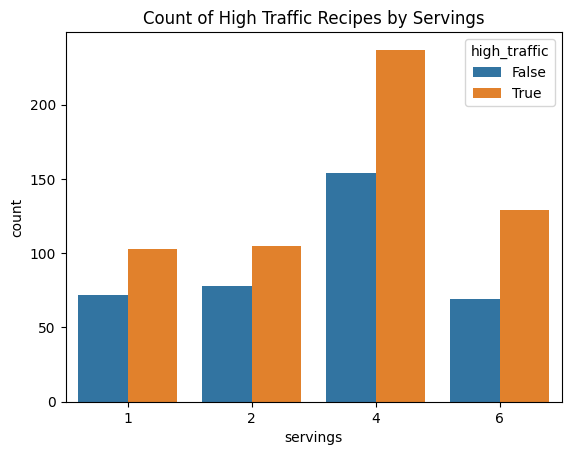

In [153]:
sns.countplot(recipe_data, x="servings", hue="high_traffic")
plt.title("Count of High Traffic Recipes by Servings")
plt.show()

In [154]:
#group by high_trafic to show how total number of survings is distributed
high_traffic_servings = pd.pivot_table(recipe_data, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic     False     True 
servings                        
1             0.411429  0.588571
2             0.426230  0.573770
4             0.393862  0.606138
6             0.348485  0.651515


The plot and the normalized data clearly show that recipes serving six people tend to have higher traffic rates.

Now, let's move on to explore how the high traffic status varies across different categories.

- Category vs. High Traffic

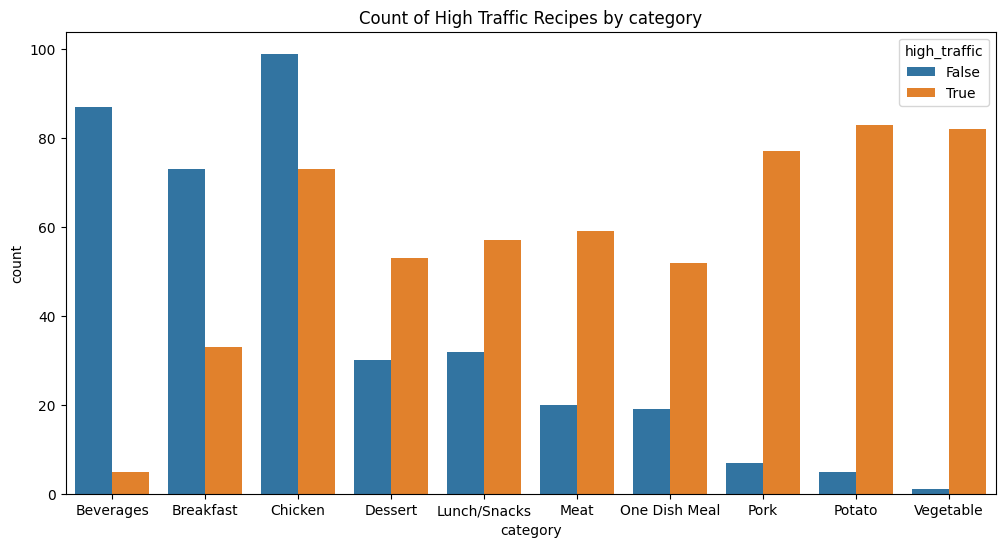

In [155]:
plt.figure(figsize=(12, 6))
sns.countplot(recipe_data, x="category", hue="high_traffic")
plt.title("Count of High Traffic Recipes by category")
plt.show()

In [156]:
#create pivot table for aggregation
high_traffic_category = recipe_data.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

#show the result
print(normalized_table)

high_traffic      False     True 
category                         
Beverages      0.939873  0.060127
Breakfast      0.685294  0.314706
Chicken        0.574830  0.425170
Dessert        0.351536  0.648464
Lunch/Snacks   0.378549  0.621451
Meat           0.272059  0.727941
One Dish Meal  0.239819  0.760181
Pork           0.072785  0.927215
Potato         0.039514  0.960486
Vegetable      0.013289  0.986711


C:\Users\PC\AppData\Local\Temp\ipykernel_16648\2561124785.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  high_traffic_category = recipe_data.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")


Therefore, it appears that featuring recipes from specific categories results in higher traffic. The categories "Vegetable," "Potato," and "Pork" attract the most traffic, while the "Beverages" category seems to have the least impact on traffic.

To address this issue, we will employ binary classification algorithms from supervised machine learning. We can choose from several appropriate classification models to predict the high traffic status, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines. For our initial model, we will start with Logistic Regression, using the other models for comparison later on.

Before we implement Logistic Regression, we need to handle the outliers in our dataset. We will calculate the Interquartile Range (IQR) for each column and then define the upper and lower boundaries to manage these outliers effectively.

In [157]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #calculate IQR
    iqr = q3 - q1
    
    #calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

In [158]:
#select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_data[column])
    outlier_limits[column] = (lower_limit, upper_limit)

#check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -605.6874999999999
Upper Limit: 1314.5724999999998
--------------------------------
Column: carbohydrate
Lower Limit: -44.2725
Upper Limit: 98.1475
--------------------------------
Column: sugar
Lower Limit: -9.860000000000001
Upper Limit: 21.220000000000002
--------------------------------
Column: protein
Lower Limit: -39.8775
Upper Limit: 75.7025
--------------------------------


As expected, the lower values in our data do not pose any issues; however, some high values need attention. We have several options for addressing this, but removing outliers outright leads to significant data loss, making it an unfavorable choice. Additionally, methods like capping outliers or using winsorization have not achieved the desired impact on the distribution.

After testing various data transformation methods, including Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, the Yeo-Johnson Transformation has proven to be the most effective.

It's important to note that some columns contain zero values. While the Box-Cox Transformation could potentially be used after substituting these zeros with a very small number (e.g., 0.00001), this could introduce bias. Hence, the Yeo-Johnson method is preferred in this scenario.

In [159]:
#drop receipe, because it's an id and it's useless for exploratory analysis and classification.
recipe_data = recipe_data.drop('recipe', axis=1)

In [160]:
#specifying the numerical columns to plot
numerical_columns =  recipe_data.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = recipe_data.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    
    #transformed_data = transformed_data[transformed_data[column] <= upper_limit]           # Removing Outliers
    #transformed_data[column] = transformed_data[column].clip(upper=upper_limit)            # Capping Outliers
    #transformed_data[column] = winsorize(transformed_data[column], limits=[0.05, 0.05])    # Winsorization
    
    #transformed_data[column] = np.log1p(transformed_data[column])                          # Logarithmic Transformation
    #transformed_data[column] = np.sqrt(transformed_data[column])                           # Square Root Transformation
    
    #transformed_data.loc[transformed_data[column] == 0, column] = 0.00001
    #transformed_data[column] = boxcox(transformed_data[column])[0]                         # Box-Cox Transformation
    
    transformed_data[column] = yeojohnson(transformed_data[column])[0]                      # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,18.063799,3.645623,1.716826,4.430576,Pork,6,True
1,5.999621,4.570565,0.483029,0.657407,Potato,4,True
2,19.117628,4.722198,1.234766,1.377911,Breakfast,1,False
3,8.916501,4.231122,2.641840,0.019807,Beverages,4,True
4,5.343929,1.112516,0.555951,0.427424,Beverages,4,False


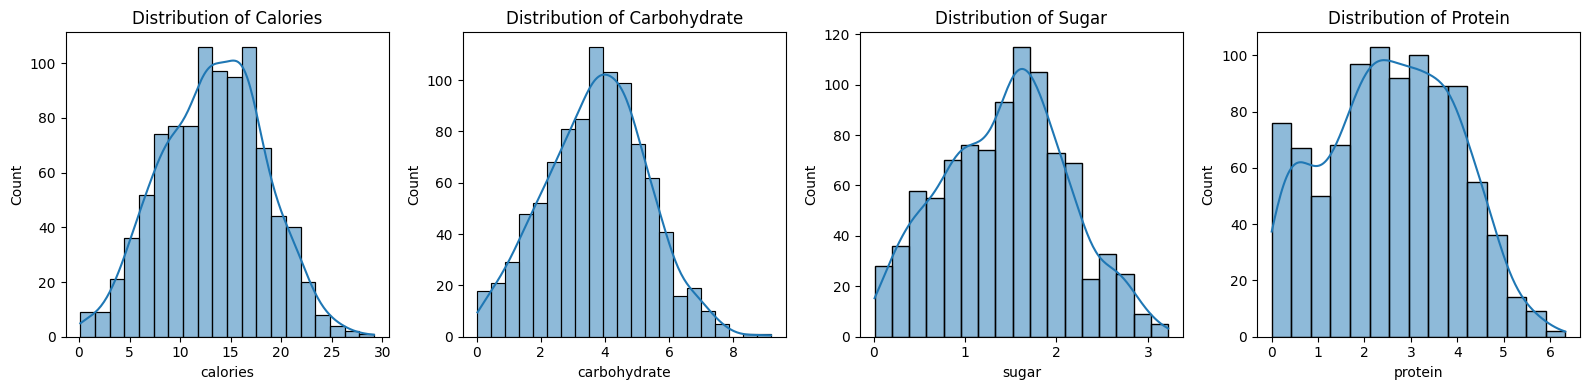

In [161]:
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

## Model Development

To enable modelling, I chose calories, carbohydrate, sugar, protein, servings, category as features, high_traffic as target variables. I also have made the following changes:

Convert the categorical variable category into numeric feature by encoding


In [162]:
#performing one-hot encoding on the category column
encoded_categories = pd.get_dummies(recipe_data["category"])

#concatenate the encoded categories with the original dataframe
recipe_data_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
recipe_data_encoded = recipe_data_encoded.drop("category", axis=1)
recipe_data_encoded.head()

,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,18.063799,3.645623,1.716826,4.430576,6,True,False,False,False,False,False,False,False,True,False,False
1,5.999621,4.570565,0.483029,0.657407,4,True,False,False,False,False,False,False,False,False,True,False
2,19.117628,4.722198,1.234766,1.377911,1,False,False,True,False,False,False,False,False,False,False,False
3,8.916501,4.231122,2.641840,0.019807,4,True,True,False,False,False,False,False,False,False,False,False
4,5.343929,1.112516,0.555951,0.427424,4,False,True,False,False,False,False,False,False,False,False,False


## Model Evaluation

We will proceed as follows:

1. **Data Splitting**: First, divide the data into features (X) and the target variable (y), with "high_traffic" serving as the target variable.
2. **Train-Test Split**: Next, split the data into training and testing sets using the `train_test_split` function from the scikit-learn library.
3. **Model Development**: Develop both the baseline model and additional models for comparison.
4. **Model Training and Prediction**: Fit the chosen model on the training data and use it to make predictions on the testing data. We will also use the `predict` method on the trained model to check for overfitting.

With these steps outlined, let’s go ahead and create the baseline and comparison machine learning models.

In [163]:
#split the data into features (X) and target variable (y)
X = recipe_data_encoded.drop("high_traffic", axis=1)
y = recipe_data_encoded["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaulation_metrics = {}

    #fit the model
    model.fit(X_train, y_train)

    #predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    #find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

In [164]:
#logistic regression
logreg = LogisticRegression()
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

In [165]:
#Comparison Models
#decision tree
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = develop_model(dtree, X_train, y_train, X_test, y_test)

#random forest
rf = RandomForestClassifier()
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

#support vector machines
svm = SVC()
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

In [166]:
def display_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

In [167]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
display_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
display_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
  Accuracy: 0.76221928665786
  Precision: 0.8034557235421166
  Recall: 0.806941431670282
  F1-Score: 0.8051948051948052
  Confusion Matrix:
[[205  91]
 [ 89 372]]
Logistic Regression Test:
  Accuracy: 0.7684210526315789
  Precision: 0.8
  Recall: 0.8141592920353983
  F1-Score: 0.8070175438596491
  Confusion Matrix:
[[54 23]
 [21 92]]


The assessment of the Logistic Regression model shows a small discrepancy between the test and train results. The fact that the test results are slightly higher than the train results suggests a limited amount of data was available for model training. Importantly, there is no evidence of overfitting.

Considering our goal is to predict high traffic recipes with at least 80% accuracy, it is crucial to focus on the precision metrics, which currently stand at 80.34%. This precision level meets our target of correctly predicting high traffic recipes 80% of the time.

In [168]:
#print the evaluation metrics and confusion matrices for Decision Tree
print("Decision Tree Train:")
display_metrics(dtree_evaluation_metrics['train'])

print("Decision Tree Test:")
display_metrics(dtree_evaluation_metrics['test'])

Decision Tree Train:
  Accuracy: 0.9960369881109643
  Precision: 0.9978260869565218
  Recall: 0.9956616052060737
  F1-Score: 0.996742671009772
  Confusion Matrix:
[[295   1]
 [  2 459]]
Decision Tree Test:
  Accuracy: 0.6736842105263158
  Precision: 0.7256637168141593
  Recall: 0.7256637168141593
  F1-Score: 0.7256637168141593
  Confusion Matrix:
[[46 31]
 [31 82]]


The Decision Tree model, known for its robustness, has shown signs of overfitting, likely due to the small size of our dataset. This overfitting suggests that the model has learned the training data too well, making it less effective for generalizing to new data.

It's worth mentioning that there are several methods to combat overfitting, such as increasing the amount of training data, implementing regularization, and using cross-validation. However, given our dataset's limited size, these strategies might not be effective.

Given these issues, the Decision Tree model may not be the most suitable choice for our dataset because of its tendency to overfit.

In [169]:
#print the evaluation metrics and confusion matrices for Random Fores
print("Random Forest Train:")
display_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
display_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
  Accuracy: 0.9960369881109643
  Precision: 0.9956709956709957
  Recall: 0.9978308026030369
  F1-Score: 0.9967497291440953
  Confusion Matrix:
[[294   2]
 [  1 460]]
Random Forest Test:
  Accuracy: 0.7315789473684211
  Precision: 0.7384615384615385
  Recall: 0.8495575221238938
  F1-Score: 0.7901234567901234
  Confusion Matrix:
[[43 34]
 [17 96]]


Like the Decision Tree model, the Random Forest model, which is also known for its robustness, demonstrates overfitting characteristics. This overfitting mirrors the issues identified with the Decision Tree model. Although the Random Forest model achieves a precision score above the desired 80%, fulfilling our objective, its tendency to overfit renders it unsuitable for our purposes.

Therefore, despite the precision score meeting our goals, the overfitting problem prevents effective utilization of the Random Forest model for this dataset.

In [170]:
# Print the evaluation metrics and confusion matrices for Support Vector Machines
print("Support Vector Machines Train:")
display_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machines Test:")
display_metrics(svm_evaluation_metrics['test'])

Support Vector Machines Train:
  Accuracy: 0.6935270805812418
  Precision: 0.6671532846715329
  Recall: 0.9913232104121475
  F1-Score: 0.7975567190226877
  Confusion Matrix:
[[ 68 228]
 [  4 457]]
Support Vector Machines Test:
  Accuracy: 0.6631578947368421
  Precision: 0.6384180790960452
  Recall: 1.0
  F1-Score: 0.7793103448275862
  Confusion Matrix:
[[ 13  64]
 [  0 113]]


Within the Support Vector Machines (SVM) model, we see signs of underfitting, which occurs because the model struggles to effectively learn from the limited training data provided. The recall value being 1 indicates that the model consistently predicts '0' for all instances, suggesting it fails to correctly identify the positive class.

We can define a Key Performance Indicator (KPI) called the "High Traffic Conversion Rate." This KPI is calculated by dividing True Positives (high traffic recipes correctly identified as such) by False Positives (low traffic recipes incorrectly identified as high traffic) within the confusion matrix. This KPI should be maintained at a level equal to or greater than 4.0, based on the training and testing results from our baseline model. This metric would be instrumental for our business model, offering crucial insights into the precision of our high traffic predictions.

## Business Metrics

We have two business objectives:

1. Predict which recipes will experience high traffic.
2. Accurately forecast the "High" traffic status of recipes with at least an 80% probability.

The Logistic Regression model has successfully met both goals without the overfitting issues seen in the Random Forest and Decision Tree models. This is evidenced by its high rates of Precision, Recall, and F1 Score, all of which are 80% or higher.

- Recommendations for future actions

To assist the Product Manager in predicting high traffic for recipes, we can put the Logistic Regression Model into production. By deploying this model, approximately 81% of the predictions will indicate high traffic, boosting the Product Manager's confidence in driving more traffic to the rest of the website.

To deploy and enhance the model, I would consider the following steps:

1. **Deployment Strategy**: Explore the best methods for deploying this model in terms of performance and cost-effectiveness. An ideal approach might involve deploying the model on edge devices, which offers the benefits of convenience and security. Additionally, testing the model with newly hired product analysts could provide insights into its practical effectiveness.

2. **Data Collection**: Expand the dataset by collecting more diverse data points, such as time required to prepare the recipe, cost per serving, ingredients used, duration of site visits (how long users stay on the recipe page), inbound links (from which sites users come to the recipe page), and recipe combinations (which recipes users visit during the same session).

3. **Feature Engineering**: Enhance the model by increasing the number of values in the category variable and creating more meaningful features from existing variables. This could involve analyzing additional dimensions of the data to improve model accuracy and relevancy.

These steps will not only refine the model's predictive accuracy but also align its capabilities more closely with the strategic goals of the website.

- KPI and the performance of models using KPI

In [171]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [172]:
#KPI calculation for Logistic Regression
calculate_kpi(logreg_evaluation_metrics, "Logistic Regresssion")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Decision Tree
calculate_kpi(dtree_evaluation_metrics, "Decision Tree")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Random Forest
calculate_kpi(rf_evaluation_metrics, "Random Forest")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Support Vector Machines
calculate_kpi(svm_evaluation_metrics, "Support Vector Machines")
print("-----------------------------------------------------------------------------------")

High Traffic Conversion Rate for Logistic Regresssion train:  4.087912087912088
High Traffic Conversion Rate for Logistic Regresssion test:  4.0
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Decision Tree train:  459.0
High Traffic Conversion Rate for Decision Tree test:  2.6451612903225805
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Random Forest train:  230.0
High Traffic Conversion Rate for Random Forest test:  2.823529411764706
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Support Vector Machines train:  2.004385964912281
High Traffic Conversion Rate for Support Vector Machines test:  1.765625
-----------------------------------------------------------------------------------


The training results for the Decision Tree and Random Forest models indicate KPIs of "230.0" and "459.0" respectively, which are attributed to overfitting. Additionally, the testing results for these models do not meet our established KPI standards.

In the case of the SVM model, underfitting is evident in both the training and testing results, leading to its failure to meet our KPI requirement.

Conversely, our baseline Logistic Regression model successfully meets the KPI requirement in both the training and testing phases.

In summary, our efforts focused on developing and evaluating multiple models to achieve our goal of accurately predicting high traffic for recipes. Among the various models tested, the logistic regression model proved to be the most effective, affirming its suitability for achieving an 80% accuracy rate in these predictions.

From a business perspective, it is more critical to avoid incorrectly predicting a high-traffic recipe as low traffic than the reverse. Therefore, we prioritized model precision since misclassifying a potential high-traffic recipe as low traffic could result in significant losses.

Additionally, we established a unique Key Performance Indicator (KPI) called "High Traffic Conversion Rate," calculated from the results of our baseline model. This KPI helped us compare the performance of the different models effectively.

Exploratory analysis revealed certain recipe categories that consistently attract high or low traffic. For instance, recipes in the "Vegetable," "Potato," and "Pork" categories generally drive high traffic and are recommended for promotion on the website. On the other hand, recipes labeled as "Beverages" typically attract less traffic, suggesting they should be less prominently featured.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation